In [2]:
#importaçoes das bibliotecas Basicas
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso 
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor# linear algebra




In [3]:
#Carregamento do Dataset
car= pd.read_csv("CarBuyers.csv")
car.head()

,Manufacturer,Model,Price,Transmission,Power,Engine CC,Fuel,Male,Female,Unknown,Total
0,Ford,Focus,30.619322,5.966102,94.033898,1497.169492,petrol,814172,422731,"56,487",1293390
1,Ford,Fiesta,18.532143,5.714286,68.571429,1166.142857,petrol,554879,631666,"54,057",1240602
2,Volkswagen,Golf,31.242154,6.164835,89.461538,1537.406593,petrol,483216,310604,"47,563",841383
3,Renault,Clio,22.100000,5.615385,75.576923,1219.653846,petrol,241287,312556,"28,004",581847
4,BMW,320i,47.848370,6.444444,126.111111,1995.777778,petrol,408016,115843,"29,125",552984


In [4]:
car.shape

(6092, 11)

In [5]:
#Informaçoes do CSV.
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092 entries, 0 to 6091
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  6092 non-null   object 
 1   Model         6092 non-null   object 
 2   Price         6092 non-null   float64
 3   Transmission  6092 non-null   float64
 4   Power         6092 non-null   float64
 5   Engine CC     6092 non-null   float64
 6   Fuel          6092 non-null   object 
 7   Male          6092 non-null   object 
 8   Female        6092 non-null   object 
 9   Unknown       6092 non-null   object 
 10  Total         6092 non-null   object 
dtypes: float64(4), object(7)
memory usage: 357.0+ KB


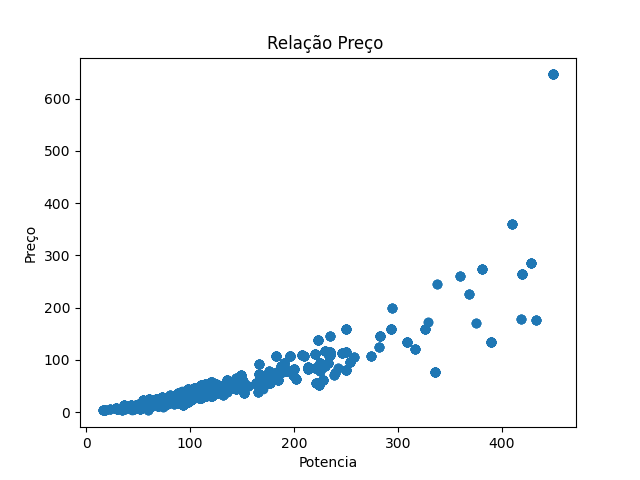

In [6]:
#Tabela de Relação entre o Peso e Automonia
plt.scatter(car[["Power"]], car[["Price"]])
plt.xlabel("Potencia")
plt.ylabel("Preço")
plt.title("Relação Preço  e Potencia")
plt.show()

In [8]:
#Pre-Processamento
X = car[["Price"]]
Y = car[["Power"]]
#Conversão 
#X["weight"] = X["weight"] * 0.453692
#Y["mpg"]= Y["mpg"] * 0.425144

In [9]:
#Normalização
escala = StandardScaler() 
escala.fit(X)
X_norm = escala.transform(X)

In [10]:
#Dividir  em conjunto de treinamento e teste 
X_norm_train, X_norm_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size= 0.5,random_state=1000)

In [18]:
regressor= LinearRegression()
regressor.fit(X_norm,Y)

LinearRegression()

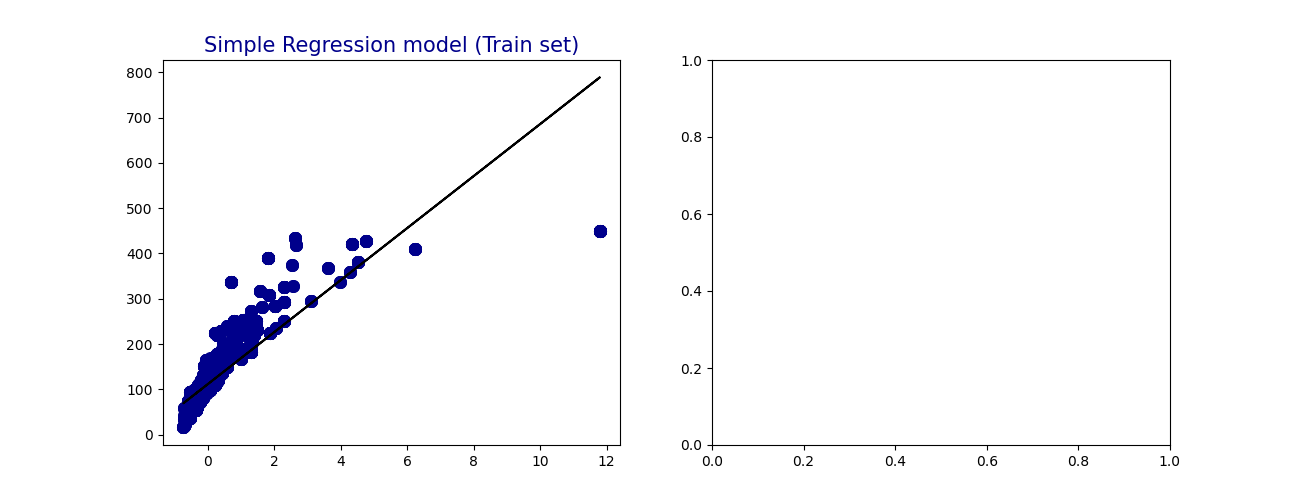

In [39]:
fig,ax= plt.subplots(ncols=2, figsize=(13,5))
# Train set
ax[0].scatter(X_norm, Y, color = 'darkblue', s=70)
ax[0].plot(X_norm, regressor.predict(X_norm), color = 'black')
ax[0].set_title('Simple Regression model (Train set)', color='darkblue', fontsize=15)
plt.show()

In [25]:
#Treinamento com 3 camadas (10,5,3)
#Numero de Epocas maximo : 1000
#Numero de Aprendizado: 0.1
trei = MLPRegressor(hidden_layer_sizes=(10,5,3),
                   max_iter=100,
                   tol = 0.0000001,
                   learning_rate_init=0.1,
                   solver="sgd",
                   activation = "logistic",
                   learning_rate = "constant",
                   verbose=2)


In [26]:
#Processo de Aprendizagem
trei.fit(X_norm_train, Y_train)
pd.DataFrame(trei.loss_curve_).plot()

/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 2978.95796389
Iteration 2, loss = 2326.66107167
Iteration 3, loss = 2312.48538138
Iteration 4, loss = 2306.54103946
Iteration 5, loss = 2304.04523484
Iteration 6, loss = 2312.45863198
Iteration 7, loss = 2308.59741650
Iteration 8, loss = 2310.88762304
Iteration 9, loss = 2304.18692522
Iteration 10, loss = 2304.83189741
Iteration 11, loss = 2305.56386310
Iteration 12, loss = 2323.39760827
Iteration 13, loss = 2307.94368243
Iteration 14, loss = 2317.09787804
Iteration 15, loss = 2306.03376349
Iteration 16, loss = 2308.81775242
Training loss did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping.


<AxesSubplot:>

In [27]:
MLPRegressor(activation='logistic', hidden_layer_sizes=(10,5,3),
             learning_rate_init=0.1, max_iter=1000, solver='sgd', tol=1e-07,
             verbose=2)

MLPRegressor(activation='logistic', hidden_layer_sizes=(10, 5, 3),
             learning_rate_init=0.1, max_iter=1000, solver='sgd', tol=1e-07,
             verbose=2)

In [28]:
#Regressão Linear
from sklearn.linear_model import SGDRegressor
reglinear = SGDRegressor(max_iter=1500,
                          tol = 0.0000001,
                         eta0= 0.1,
                         learning_rate="constant",
                         verbose=2,
                        )

In [29]:
reglinear.fit(X_norm_train, Y_train)

/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 1
Norm: 70.08, NNZs: 1, Bias: 112.799751, T: 3046, Avg. loss: 12606.461116
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 98.13, NNZs: 1, Bias: 116.123395, T: 6092, Avg. loss: 8976.967794
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 95.96, NNZs: 1, Bias: 119.346033, T: 9138, Avg. loss: 9455.120858
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 98.10, NNZs: 1, Bias: 121.828494, T: 12184, Avg. loss: 48454.425334
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 72.06, NNZs: 1, Bias: 118.347560, T: 15230, Avg. loss: 16305.586575
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 165.27, NNZs: 1, Bias: 150.813721, T: 18276, Avg. loss: 19468.724438
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 91.19, NNZs: 1, Bias: 116.251617, T: 21322, Avg. loss: 11765.042963
Total training time: 0.02 seconds.
Convergence after 7 epochs took 0.02 seconds


SGDRegressor(eta0=0.1, learning_rate='constant', max_iter=1500, tol=1e-07,
             verbose=2)

In [30]:
#Previssão do conjunto de teste
Y_rna_previsao = trei.predict(X_norm_train)
Y_rl_previsao = reglinear.predict(X_norm_train)

In [31]:
print("RNA: ",y_rna_prev_futuro)
print("Reg Linear: ",y_reglinear_prev_futuro)

<class 'NameError'>: name 'y_rna_prev_futuro' is not defined

In [32]:
#Calcular o R^2
r2_trei = r2_score(Y_train,Y_rna_previsao)*(-1)
r2_rl = r2_score(Y_train,Y_rl_previsao)

In [33]:
X_test = escala.inverse_transform(X_norm_test)
plt.scatter(X_test, Y_test, alpha = 0.8, label="Preço",arry)
plt.scatter(X_test, Y_rna_previsao, alpha = 0.8, label="Potencia")
plt.scatter(X_test, Y_rl_previsao, alpha = 0.8, label="Regressao linear")
plt.xlabel("Potencia")
plt.ylabel("Preço)")
plt.title ("Comparação dos algoritmos previsto")
plt.legend(loc=1)
plt.show()

<class 'SyntaxError'>: positional argument follows keyword argument (<ipython-input-33-9fae295f9e3c>, line 2)

In [34]:
#Prever para um novo dado
X_futuro= np.array([[100]])
X_futuro_norm = escala.transform(X_futuro.T)

/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [35]:
y_rna_prev_futuro = trei.predict(X_futuro_norm)
y_reglinear_prev_futuro = reglinear.predict(X_futuro_norm)

In [36]:
#Autonomia prevista...
print("RNA: ",y_rna_prev_futuro)
print("Reg Linear: ",y_reglinear_prev_futuro)

RNA:  [117.88749587]
Reg Linear:  [220.6109595]


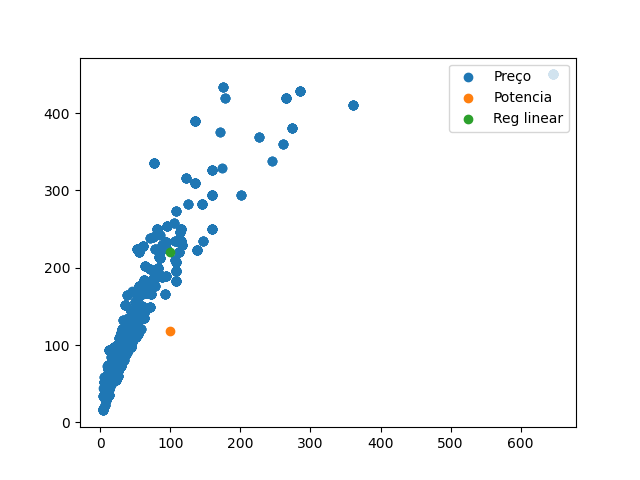

In [38]:
plt.scatter(X, Y, label="Preço")
plt.scatter(X_futuro, y_rna_prev_futuro, label="Potencia")
plt.scatter(X_futuro, y_reglinear_prev_futuro, label="Reg linear")
plt.legend(loc=1)
plt.show()